In [1]:
## Bring in needed ods
import pandas as pd, numpy as np, scipy.stats as ss
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
## write ftns for analysis
def allelic_ANOVA(site, pheno):
    """
    This regression is equivalent to one-way ANOVA with 2 groups. 
    Return F-statistic.
    Assumes site is coded as -1, 1
    """
    coding = np.array(site, np.float)
    pheno = np.array(pheno, np.float)
    
    meany = np.mean(pheno)
    meandummy = np.mean(coding)
    ctry = pheno - meany
    ctrdummy = coding - meandummy
    
    # regression coefficient and intercept
    b = np.dot(ctry, ctrdummy)/np.dot(ctrdummy, ctrdummy)
    intercept = meany - b * meandummy
    
    yhat = b * ctrdummy
    len_yhat = np.sqrt(np.dot(yhat,yhat))
    len_y = np.sqrt(np.dot(ctry,ctry))
    df_yhat = 1
    
    error = ctry  - yhat
    len_error = np.sqrt(np.dot(error,error))
    if abs(len_error**2) < 1e-5:
        raise Exception("Zero length error in ANOVA")
    df_error = len(pheno) - 2
    
    # coefficient of determination is R**2
    #R = len_yhat/len_y
    # F-statistic
    F = (len_yhat**2/df_yhat) / (len_error**2/df_error)
    return F

def association_logPval(site, pheno):
    F = allelic_ANOVA(site, pheno)
    logP = np.log10(ss.f.sf(F, 1, len(pheno)-2))
    return -logP

def crypto_kruskal(site,pheno):
    refxpheno = np.array(pheno,dtype=float)[np.array(site)==0]
    altxpheno = np.array(pheno,dtype=float)[np.array(site)==1]
    return -np.log10(ss.kruskal(refxpheno,altxpheno)[1])

## Define ftns for use in QTL mapping
def allelic_manu(geno,pheno,x=0,y=1): ## geno and pheno need to be in the same position
    """
    Conducts a Mann-Whitney U test on the phenotype data in PHENO
    by the genotypic states listed in GENO.
    
    Assumes the order of data within GENO and PHENO are paired.
    Defaluts for the biallelic stat in GENO are 0 and 1; set in X and Y.
    
    Returns the -log10 of the calculated p-value
    """
    pheno = np.array(pheno) ## sets the type for the data as an array
    geno = np.array(geno)
    ## Gather phenotypes by genotypes 
    ## Parse the genotype data as True for 0 and then 1 and 
    ## take the asscoiated index within the phenotypic data array
    ## Return p-value
    return -np.log10(ss.mannwhitneyu(pheno[(geno==x)],pheno[(geno==y)])[1])

fs=12

In [3]:
## Load phentype data
#data_path = '../../PHENOTYPE/XL280x431/XL280x431_cross_amoeba_processed_10_23_2020.csv'
#ph = pd.read_csv(data_path)
#ph = ph[(ph.Strain!='KN99')]
#ph['Area.1'] = (np.sqrt(ph['Area.1'])*2.45)**2
#ph['Area.12'] = (np.sqrt(ph['Area.12'])*2.45)**2

#ph.head()

In [4]:
## Load phentype data
data_path = '../../PHENOTYPE/XL280x431/XL280x431_cross_amoeba_processed_01_08_2021.csv'
ph = pd.read_csv(data_path)
ph = ph[(ph.Strain!='KN99')]
#ph['Area.1'] = (np.sqrt(ph['Area.1'])*2.45)**2
#ph['Area.12'] = (np.sqrt(ph['Area.12'])*2.45)**2

ph.head()


,Strain,Replicate,Stack,passage,plate,Area.1,Area.12
0,431alpha,1,2,10,p2_1,1.470965,11.658041
1,431alpha,1,1,11,p1_1,1.587094,17.741900
2,431alpha,2,2,4,2_2-1_2_firsthalf,1.445158,17.270933
3,431alpha,2,5,5,2_2-1_2_secondhalf,1.567739,22.199956
4,431alpha,3,1,9,2_3-1_3_secondhalf,2.419350,10.696753


In [5]:
## Load phentype data
data_path2 = "../../PHENOTYPE/XL280x431/Segs_XL280x431_halo.csv"
segs = pd.read_csv(data_path2)
segs = segs[(segs.Strain!='KN99')]
#ph['Area.1'] = (np.sqrt(ph['Area.1'])*2.45)**2
#ph['Area.12'] = (np.sqrt(ph['Area.12'])*2.45)**2

segs.head()

,Strain,Day,Stack,Plate,Passage,Area,Mean,Min,Max,Replicate,Sample
0,B560,1,1,p2_1,10,0.786,20653.039,16551.0,27029.0,1,SS-B560
1,B313,1,1,p2_1,10,0.598,20776.284,17215.0,25699.0,1,SS-B313
2,B887_cor,1,1,p2_1,10,0.097,20857.606,18288.0,28200.0,1,SS-B887_cor
3,C272,1,1,p2_1,10,0.949,20819.746,16169.0,29019.0,1,SS-C272
4,C242,1,1,p2_1,10,0.532,21357.110,18833.0,28168.0,1,SS-C242


In [6]:
#segs.drop(['Plate', 'Mean', 'Min', 'Max'], axis = 1, inplace=True)

segs.head()

,Strain,Day,Stack,Plate,Passage,Area,Mean,Min,Max,Replicate,Sample
0,B560,1,1,p2_1,10,0.786,20653.039,16551.0,27029.0,1,SS-B560
1,B313,1,1,p2_1,10,0.598,20776.284,17215.0,25699.0,1,SS-B313
2,B887_cor,1,1,p2_1,10,0.097,20857.606,18288.0,28200.0,1,SS-B887_cor
3,C272,1,1,p2_1,10,0.949,20819.746,16169.0,29019.0,1,SS-C272
4,C242,1,1,p2_1,10,0.532,21357.110,18833.0,28168.0,1,SS-C242


In [7]:
len(segs[(segs.Replicate == 3) & (segs.Day == 12)])

73

In [8]:
len(segs.Strain.unique())

98

In [9]:
segs.Sample.unique()

array(['SS-B560', 'SS-B313', 'SS-B887_cor', 'SS-C272', 'SS-C242',
       'SS-C031_cor', 'SS-B316', 'SS-B350', 'SS-B908', 'SS-B356',
       'SS-B886_cor', 'SS-C291', 'SS-C029_cor', 'SS-B315', 'SS-B354',
       'XL280alpha', 'SS-C033', 'SS-C271', 'SS-B570', 'SS-C036',
       'SS-B307', 'SS-B872', 'SS-B314', 'SS-C039', 'SS-B874_cor',
       'SS-B317', 'SS-B311', 'SS-B382', 'SS-B930', 'SS-B906', 'SS-B874',
       'SS-B887', 'SS-C290', 'SS-B961', 'SS-B310', 'SS-B358', 'SS-B929',
       'SS-B312', 'SS-B599', 'SS-B905', 'SS-B580', 'SS-B586', 'SS-B564',
       'SS-B591', 'SS-B997', 'SS-B611', 'SS-B996', 'SS-B397',
       'SS-B961_cor', 'SS-B357', 'SS-B606', 'SS-B901_cor', 'SS-B399',
       'SS-B869_cor', 'SS-B579', 'SS-B898_cor', 'SS-B605', 'SS-B574',
       'SS-B896_cor', 'SS-B908_cor', 'SS-B407', 'SS-B890_cor', 'SS-B369',
       'SS-B387', 'SS-B956', 'SS-B364', 'SS-B378', 'SS-B876', 'SS-B926',
       'SS-B368', 'SS-B960_cor', 'SS-B588', 'SS-B360', 'SS-B927',
       'SS-B565', 'SS-B563', 'SS-

In [10]:
ring = []
a = 0

for i,j in segs.groupby(["Sample", "Replicate"]):

    if len(j) <2:
        a +=1
    else:
        a12 = j[(j.Day == 12)].Area.values[0] if len(j[(j.Day == 12)]) >0 else 0
        a1 = j[(j.Day == 1)].Area.values[0] if len(j[(j.Day == 1)]) >0 else 0
        adiff = a12 - a1
#    print(adiff)
        ring.append((i[0],i[1],pd.to_numeric(adiff)))
    
ringdf = pd.DataFrame(ring, columns = ["Sample", "Replicate", "Halo"])

ringdf.head()

,Sample,Replicate,Halo
0,SS-B307,1,4.726
1,SS-B307,2,1.939
2,SS-B307,3,2.805
3,SS-B310,1,1.758
4,SS-B310,2,2.201


In [11]:
ringdf.Sample.unique()

array(['SS-B307', 'SS-B310', 'SS-B311', 'SS-B312', 'SS-B313', 'SS-B314',
       'SS-B315', 'SS-B316', 'SS-B317', 'SS-B350', 'SS-B354', 'SS-B356',
       'SS-B357', 'SS-B358', 'SS-B360', 'SS-B364', 'SS-B366', 'SS-B368',
       'SS-B369', 'SS-B374', 'SS-B378', 'SS-B379', 'SS-B382', 'SS-B383',
       'SS-B387', 'SS-B396', 'SS-B397', 'SS-B399', 'SS-B407', 'SS-B553',
       'SS-B560', 'SS-B563', 'SS-B564', 'SS-B565', 'SS-B569', 'SS-B570',
       'SS-B574', 'SS-B579', 'SS-B580', 'SS-B584', 'SS-B585', 'SS-B586',
       'SS-B587', 'SS-B588', 'SS-B589', 'SS-B591', 'SS-B598', 'SS-B599',
       'SS-B600', 'SS-B605', 'SS-B606', 'SS-B611', 'SS-B621',
       'SS-B869_cor', 'SS-B872', 'SS-B873_cor', 'SS-B874', 'SS-B874_cor',
       'SS-B876', 'SS-B880', 'SS-B886_cor', 'SS-B887', 'SS-B887_cor',
       'SS-B890_cor', 'SS-B892_cor', 'SS-B896_cor', 'SS-B898_cor',
       'SS-B901_cor', 'SS-B905', 'SS-B906', 'SS-B906_cor', 'SS-B908',
       'SS-B908_cor', 'SS-B926', 'SS-B927', 'SS-B929', 'SS-B930',
       

In [12]:
segs[~(segs.Sample.isin(ringdf.Sample.unique()))]

,Strain,Day,Stack,Plate,Passage,Area,Mean,Min,Max,Replicate,Sample


In [13]:
ringdf[~(ringdf.Sample.isin(segs.Sample.unique()))]

,Sample,Replicate,Halo


In [14]:
len(ringdf.Sample.unique())

98

In [15]:
a

22

In [16]:
spr_piv = ringdf.pivot_table(index = 'Sample',
          columns = 'Replicate',
         values = 'Halo')

spr_piv.head()

Replicate,1,2,3
Sample,,,
SS-B307,4.726,1.939,2.805
SS-B310,1.758,2.201,8.286
SS-B311,1.034,2.497,0.865
SS-B312,3.506,4.911,1.247
SS-B313,4.309,2.187,2.020


In [17]:
ss.spearmanr(spr_piv, nan_policy='omit')

SpearmanrResult(correlation=array([[1.        , 0.30195403, 0.53881119],
       [0.30195403, 1.        , 0.29076297],
       [0.53881119, 0.29076297, 1.        ]]), pvalue=array([[0.00000000e+00, 5.24705101e-03, 3.65231488e-06],
       [5.24705101e-03, 0.00000000e+00, 1.78625361e-02],
       [3.65231488e-06, 1.78625361e-02, 0.00000000e+00]]))

In [18]:
ph.Replicate.unique()

array([1, 2, 3], dtype=int64)

In [19]:
## Load genotype data
genotype_path = '../../GENOTYPE/CDx-ill-SNP-INDEL-df-104-blocked.csv.gz'
gv = pd.read_csv(genotype_path)
gv.head()

,Chrom,Pos,Qual,Callrate,Ref,Alt,Altlen,Dp,Type,Vcfix,...,SS-B598,SS-B565,SS-B600,SS-B574,SS-B872_cor,SS-B873_cor,SS-B360,SS-B397,SS-B564,SS-B382
0,Chr01,5016,104492.0,1.0,C,A,1,6510,snp,289,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,Chr01,5299,112647.0,1.0,T,C,1,9711,snp,293,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Chr01,5464,112658.0,1.0,T,C,1,9375,snp,294,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,Chr01,6120,109003.0,1.0,T,C,1,9311,snp,311,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,Chr01,6166,114638.0,1.0,G,A,1,9269,snp,312,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [20]:
Strain_names = []
Dont_rep = []
for i,j in ph.iterrows():
    
    s = j.Strain
    
    if s in gv.columns:
        Strain_names.append(s)
    
    elif 'SS-'+s in gv.columns:
        Strain_names.append('SS-'+s)
            
    elif s == '431alpha':
        Strain_names.append('SS-A837')
    elif s == 'KN99':
        Strain_names.append('KN99')
    else:
        Dont_rep.append('SS-'+s)
        Strain_names.append(s)

print(len(Strain_names))
print(Strain_names[:10])

323
['SS-A837', 'SS-A837', 'SS-A837', 'SS-A837', 'SS-A837', 'SS-A837', 'SS-B307', 'SS-B307', 'SS-B307', 'B308']


In [21]:
len(Dont_rep)

46

In [22]:
ph['Sample'] = Strain_names

for i,j in ph.iterrows():
    if not j.Strain == j.Sample.split('SS-')[-1]:
        print(j.Strain)

431alpha
431alpha
431alpha
431alpha
431alpha
431alpha


In [23]:
ph.head()

,Strain,Replicate,Stack,passage,plate,Area.1,Area.12,Sample
0,431alpha,1,2,10,p2_1,1.470965,11.658041,SS-A837
1,431alpha,1,1,11,p1_1,1.587094,17.741900,SS-A837
2,431alpha,2,2,4,2_2-1_2_firsthalf,1.445158,17.270933,SS-A837
3,431alpha,2,5,5,2_2-1_2_secondhalf,1.567739,22.199956,SS-A837
4,431alpha,3,1,9,2_3-1_3_secondhalf,2.419350,10.696753,SS-A837


In [24]:
ph[(ph.Strain=='431alpha')]

,Strain,Replicate,Stack,passage,plate,Area.1,Area.12,Sample
0,431alpha,1,2,10,p2_1,1.470965,11.658041,SS-A837
1,431alpha,1,1,11,p1_1,1.587094,17.741900,SS-A837
2,431alpha,2,2,4,2_2-1_2_firsthalf,1.445158,17.270933,SS-A837
3,431alpha,2,5,5,2_2-1_2_secondhalf,1.567739,22.199956,SS-A837
4,431alpha,3,1,9,2_3-1_3_secondhalf,2.419350,10.696753,SS-A837
5,431alpha,3,4,7,2_3-1_3_firsthalf,1.193546,14.083843,SS-A837


In [25]:
ph.to_csv('../../PHENOTYPE/XL280x431/XL280x431_cross_amoeba_roth_processed_01_26_2021.csv')

In [26]:
pheno = ph[(ph.Sample.isin(gv.columns))][['Sample','Area.12']]
pheno.columns = ['Sample','Growth'] ## Rename column names
## Take mean phenotype per strain
mean_pheno = pheno.groupby('Sample').mean().sort_values('Growth')
mean_pheno.shape

(104, 1)

In [27]:
mean_pheno.dropna().shape

(104, 1)

In [28]:
mean_pheno.dropna(inplace=True)

In [29]:
mean_pheno.shape

(104, 1)

In [30]:
mean_pheno.reset_index(inplace=True)

# Phenotype visulization and exploration

In [31]:
from matplotlib import rc
xl280alpha_label = 'XL280'+r'$\alpha$'
xl280a_label = 'XL280' +r'$\bf{a}$'
_431_label = '431'+r'$\mathrm{\alpha}$'

#myylabel = 'Area of clearance\nby amoeba (cm$^2$)\n$\longleftarrow$resistant - sensitive$\longrightarrow$'
myylabel = 'Amoeba clearance area (cm$^2$)\n$\longleftarrow$resistant - sensitive$\longrightarrow$'
parentals = ['SS-A837','XL280a']#,'XL280alpha']
parental_labels = [_431_label,xl280a_label]#,xl280alpha_label]

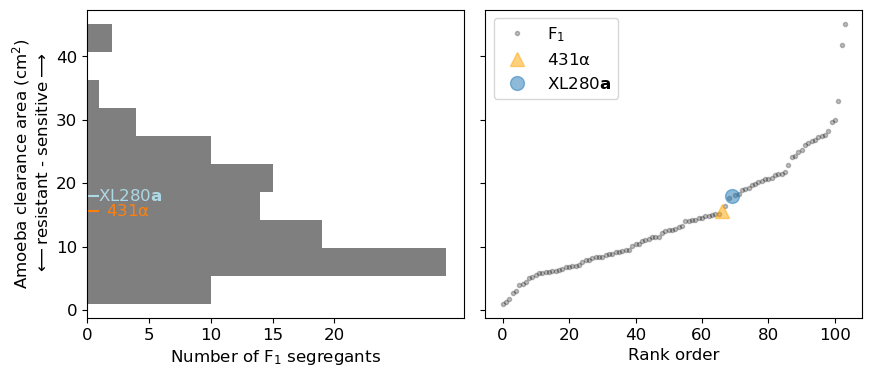

In [32]:
## Plot segregants
fig,ax = plt.subplots(1,2,figsize=(10,4),sharey=True)

plt.sca(ax[0])
## Plot all
plt.hist(mean_pheno.Growth.values,
         color='k',alpha=0.5,
         orientation='horizontal')
         
## Label x and y axis
plt.ylabel(myylabel,fontsize=fs)
plt.xlabel('Number of F$_1$ segregants',fontsize=fs);

## Plot parents
_431_growth = mean_pheno[(mean_pheno.Sample=='SS-A837')].Growth
plt.hlines(_431_growth,
           0,1,color='tab:orange',label=parental_labels[0])

## annotate the parental strain name
plt.text(1.5,_431_growth,s=parental_labels[0],
         va='center',ha='left',fontsize=fs,color='tab:orange')


## Plot parents
xl280a_growth = mean_pheno[(mean_pheno.Sample=='XL280a')].Growth
plt.hlines(xl280a_growth,
           0,1,color='lightblue',label=parental_labels[1]);

## annotate the parental strain name
plt.text(3.5,xl280a_growth,s=parental_labels[1],
         va='center',ha='center',
         fontsize=fs,color='lightblue');

plt.xticks(np.arange(0,25,5),fontsize=fs)
plt.yticks(fontsize=fs)
## Summon the legend
#plt.legend(fontsize=fs);

plt.sca(ax[1])
plt.plot(mean_pheno[~(mean_pheno.Sample.isin(parentals))].index,
         mean_pheno[~(mean_pheno.Sample.isin(parentals))].Growth.values,
         'k.',alpha=0.25,label='F$_{1}$');


for i,p in enumerate(parentals):
    
    plt.plot(mean_pheno[(mean_pheno.Sample == p )].index,
         mean_pheno[(mean_pheno.Sample == p)].Growth.values,
         'o' if i ==1 else '^',alpha=0.5,label=parental_labels[i],
             color='orange' if p =='SS-A837' else 'tab:blue',ms=10);
    
plt.xlabel('Rank order',fontsize=fs);
plt.xticks(fontsize=fs)
#plt.ylabel(myylabel,
#           fontsize=fs)
plt.legend(fontsize=fs);
plt.subplots_adjust(wspace=0.058)
plt.savefig('../../FIGURES/XL280x431_amoeba_assay.png',
            dpi=150,bbox_inches='tight');

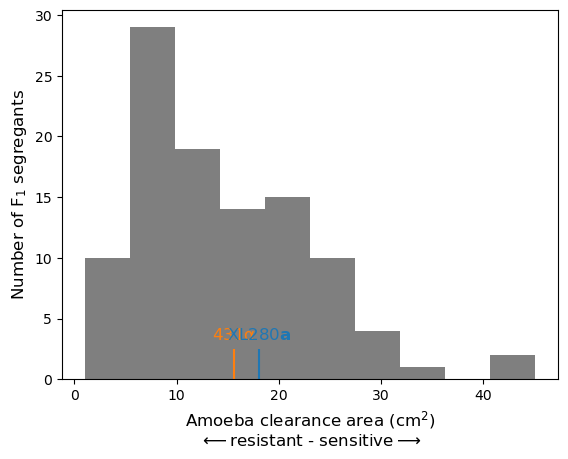

In [34]:
## Plot all
plt.hist(mean_pheno.Growth.values,
         color='k',alpha=0.5,label='$F_1$')
         
## Label x and y axis
plt.xlabel(myylabel,fontsize=fs)
plt.ylabel('Number of F$_1$ segregants',fontsize=fs);

## Plot parents

_431_growth = mean_pheno[(mean_pheno.Sample=='SS-A837')].Growth
plt.vlines(_431_growth,
           0,2.5,color='tab:orange',label=parental_labels[0])

## annotate the parental strain name
plt.text(_431_growth,3,s=parental_labels[0],
         va='bottom',ha='center',fontsize=fs,color='tab:orange')


## Plot parents
xl280a_growth = mean_pheno[(mean_pheno.Sample=='XL280a')].Growth
plt.vlines(xl280a_growth,
           0,2.5,color='tab:blue',label=parental_labels[1]);

## annotate the parental strain name
plt.text(xl280a_growth,3,s=parental_labels[1],
         va='bottom',ha='center',fontsize=fs,color='tab:blue');

plt.savefig('../../FIGURES/XL280x431_hist_amoeba.png',
            dpi=150,bbox_inches='tight');

In [ ]:
ss.shapiro(mean_pheno.Growth.values)

In [ ]:
ss.normaltest(mean_pheno.Growth.values)

# QTL Mapping

In [ ]:
mapping_pop = mean_pheno.Sample.tolist()
len(mapping_pop)

In [ ]:
## Gather unique loci
loci = gv[mapping_pop].drop_duplicates().copy()
loci.head()

In [ ]:
tworing = ringdf[ringdf.Replicate != 2]

In [ ]:
tworing.head()

In [ ]:
mean_two = tworing.groupby('Sample').mean().sort_values('Halo')
mean_two.dropna(inplace = True)

mean_two['Sample'] = mean_two.index
mean_two.drop('Replicate', axis = 1,inplace = True)

In [ ]:
mean_two.head()

In [ ]:
mapping_pop2 = mean_two.Sample.unique().tolist()
mapped = loci[mapping_pop2].apply(allelic_manu,args=[mean_two.Halo.values],axis=1)
loci['pvalmin2'] = mapped

loci

In [ ]:
byrep = []
iterator = 1

for i,j in ringdf.groupby('Replicate'):
    
    mapping_pop1 = j.Sample.tolist()
    mapped = loci[mapping_pop1].apply(allelic_manu,args=[j.Halo.values],axis=1)
    col_name = 'pval' + str(iterator)
    loci[col_name] = mapped
    
    iterator += 1 

loci

In [ ]:
test = ['pval1', 'pval2', 'pval3']

for a in test:
    print(a)

In [ ]:
fig,ax = plt.subplots(3,1,figsize=(12,6), sharey=True)
z = 0

for a in test:
    plt.sca(ax[z])
    for i,j in chrommap.iterrows():
    
        temp = qtldf[(qtldf.Chrom == j.Chrom)]
    
        plt.plot( temp.Pos.values+j.Cumlen, temp[a].values,'.',alpha=0.5);
        plt.xticks(chrommap.Midpts.values, np.arange(1,15),fontsize=14)
    if z== 1:
        plt.ylabel("$-log_{10}(p-value)$",fontsize=14);
        plt.xlabel('Chromosome',fontsize=14);
    z += 1


#plt.savefig('C:/Users/Thomas/Pictures/scientific figures/XL280x431_amoeba_assay_QTL.png',
#           dpi=200,bbox_inches='tight');
#ax1 = fig.add_axes([0.125,-0.75,.3,.1])

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(12,3))

for i,j in chrommap.iterrows():
    
    
    temp = qtldf[(qtldf.Chrom == j.Chrom)]
    
    plt.plot( temp.Pos.values+j.Cumlen, temp.pvalmin2.values,'.',alpha=0.5);

plt.xticks(chrommap.Midpts.values, np.arange(1,15),fontsize=14)
plt.ylabel("$-log_{10}(p-value)$",fontsize=14);
plt.xlabel('Chromosome',fontsize=14);
plt.text(chrommap.Midpts.min()-100000,threshold,'$\u03B1$ = 0.05',
         fontsize=12,alpha=0.2,ha='right',va='center')
plt.hlines(threshold,chrommap.Midpts.min(),19*10**6,
           linestyle='--',linewidth=1,color='k',alpha=0.2)
#plt.savefig('C:/Users/Thomas/Pictures/scientific figures/XL280x431_amoeba_assay_QTL.png',
#           dpi=200,bbox_inches='tight');
#ax1 = fig.add_axes([0.125,-0.75,.3,.1])

In [ ]:
## Cunduct QTL mapping

loci['Pval'] = loci[mapping_pop].apply(allelic_manu,args=[mean_pheno.Growth.values],axis=1)
#loci['Pval'] = loci[mapping_pop].apply(crypto_kruskal,args=[mean_pheno.Growth.values],axis=1)

In [ ]:
loci

In [ ]:
## Merge results
qtldf = gv.merge(loci)

In [ ]:
## Set significance threshold for QTL mapping
## If this threshold is above zero 
## the cell below was previously run
## Set to -1 to re run calculation
threshold = 4.335593740894622## 0.05 threshold

## Set permutations, 
## Gather phenotype into an array
## make list of permutated data.
perms = 1000
pheno = mean_pheno.Growth.values
perms_pheno = [np.random.permutation(pheno) for i in range(perms)]

## Gather loci and intiate null distrbution
loci = gv[mapping_pop].drop_duplicates() 

if threshold < 0:
    null = []
    i = 0
    while len(null) < perms:
        
        ## Permute the phenotypic space
        null.append(loci.apply(allelic_manu,
                               args=[perms_pheno[i]],
                               axis=1).max())
        i += 1 ## Add one to i
        
    ## Take the upper 95th percentile    
    threshold = np.percentile(null,95 if perms <= 1000 else 99)

In [ ]:
## Set significance threshold for QTL mapping
## If this threshold is above zero 
## the cell below was previously run
## Set to -1 to re run calculation
threshold2 = 4.108260726936035## 0.05 threshold

## Set permutations, 
## Gather phenotype into an array
## make list of permutated data.
perms = 500
pheno = mean_two.Halo.values
perms_pheno = [np.random.permutation(pheno) for i in range(perms)]

## Gather loci and intiate null distrbution
loci = gv[mapping_pop2].drop_duplicates() 

if threshold2 < 0:
    null = []
    i = 0
    while len(null) < perms:
        
        ## Permute the phenotypic space
        null.append(loci.apply(allelic_manu,
                               args=[perms_pheno[i]],
                               axis=1).max())
        i += 1 ## Add one to i
        
    ## Take the upper 95th percentile    
    threshold2 = np.percentile(null,95 if perms <= 1000 else 99)

In [ ]:
threshold2

## Plot QTL

In [ ]:
## Make a list of the unique chromosomes
chrlist = sorted(qtldf.Chrom.unique())
assert len(chrlist)==14
print(chrlist[:4])

In [ ]:
## Estimate and gather maximum chromosome length
chrommap = qtldf.groupby('Chrom')['Pos'].max().reset_index()

chrommap['Cumlen'] = [0] + chrommap.Pos.cumsum().tolist()[:-1]
chrommap['Midpts'] = (chrommap.Pos.values/2) + chrommap.Cumlen.values

chrommap.head()

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(12,3))

for i,j in chrommap.iterrows():
    
    
    temp = qtldf[(qtldf.Chrom == j.Chrom)]
    
    plt.plot( temp.Pos.values+j.Cumlen, temp.Pval.values,'.',alpha=0.5);

plt.xticks(chrommap.Midpts.values, np.arange(1,15),fontsize=14)
plt.ylabel("$-log_{10}(p-value)$",fontsize=14);
plt.xlabel('Chromosome',fontsize=14);
plt.text(chrommap.Midpts.min()-100000,threshold,'$\u03B1$ = 0.05',
         fontsize=12,alpha=0.2,ha='right',va='center')
plt.hlines(threshold,chrommap.Midpts.min(),19*10**6,
           linestyle='--',linewidth=1,color='k',alpha=0.2)
plt.savefig('C:/Users/Thomas/Pictures/scientific figures/XL280x431_amoeba_assay_QTL.png',
           dpi=200,bbox_inches='tight');
#ax1 = fig.add_axes([0.125,-0.75,.3,.1])

In [ ]:
qtlix = qtldf.Pval.idxmax()
qtlchorm = qtldf.loc[qtlix,'Chrom']
qtlchorm

In [ ]:
temp = qtldf[(qtldf.Chrom == qtlchorm)]

In [ ]:
mean_pheno['QTL'] = gv.loc[qtlix,mapping_pop].values

In [ ]:
mean_pheno.head()

In [ ]:
import statsmodels.formula.api as smf, seaborn as sns
res = smf.ols('Growth~QTL',data=mean_pheno).fit()
res.summary()

In [ ]:
-np.log10(res.pvalues[1])

In [ ]:
r2 = np.round(res.rsquared,2)
r2

In [ ]:
mean_pheno['QTL']=mean_pheno['QTL'].apply(float)

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(5,4))
#just_segs = mean_pheno[~(mean_pheno.Sample.isin(parental_labels[:2]))]
sns.swarmplot(x='QTL',y='Growth',data=mean_pheno,
              alpha=0.95,color='tab:grey');
sns.regplot(x = "QTL", y = "Growth", data = mean_pheno, ci=False,
            line_kws = {"alpha":0.8, "color":"red"}, 
            scatter_kws = {"alpha":0});

#for gt in [0,1]:
#    plt.hlines(mean_pheno[(mean_pheno.QTL==gt)].Growth.mean(),
#           -0.2+gt,0.2+gt,linestyle='--',
#               color='blue' if gt == 0 else 'darkorange')

plt.text(0.5,0.8,'$R^2 = %s$'%r2,color='k',
         va='center',ha='center',fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel(myylabel,fontsize=14)
plt.xlabel('Parental Allele',fontsize=14)
plt.xticks([0,1],parental_labels[:2][::-1],fontsize=14)
plt.savefig('C:/Users/Thomas/Pictures/scientific figures/XL280x431_amoeba_assay_genotype_by_phenotype.png',
           dpi=100,bbox_inches='tight');

# Transgressive Segregation

In [ ]:
mean_pheno.head()

In [ ]:
xl = mean_pheno[mean_pheno.Sample == "XL280a"].Growth.values[0]
four = mean_pheno[mean_pheno.Sample == "SS-A837"].Growth.values[0]

xl, four

In [ ]:
tran_total = len(mean_pheno.Growth)

tran_neg = len(mean_pheno[mean_pheno.Growth > xl].Growth)/tran_total

tran_pos = len(mean_pheno[mean_pheno.Growth < four].Growth)/tran_total

tran_non = len(mean_pheno[(mean_pheno.Growth < xl) & (mean_pheno.Growth > four)].Growth)/tran_total

tran_neg, tran_pos, tran_non, tran_total

In [ ]:
gene_changes = pd.read_csv('/home/croth/crypto-QTL-paper/DATA/XL280_431_gene_analysis.csv.gz')
gff = pd.read_csv('/home/croth/crypto-QTL-paper/DATA/xl280genome.gff3.csv.gz',index_col=0)

## Boot strap phenotype and genotype on chromosome 7

In [ ]:
bsp = []
perms = 200
mean_pheno.index = mean_pheno.Sample
chrom = gv[(gv.Chrom==qtlchorm)
          ][mapping_pop+['Pos']].copy().reset_index(drop=True)

#for i in range(perms):
#    
#    bsegs = np.random.choice(mapping_pop,len(mapping_pop))
#    bpheno = mean_pheno.loc[bsegs,'Growth'].values
    
#    bloci = chrom[bsegs].drop_duplicates()
    
#    bloci['Pval'] = bloci.apply(association_logPval,args=[bpheno],axis=1)
        
#    bres = chrom.merge(bloci.T.drop_duplicates().T)
#    bres.sort_values('Pval',inplace=True)
    
#    bpos = bres[(bres.Pval==bres.Pval.max())].Pos.median()
#    bsp.append((bpos,bres.Pval.max()))
    
#bdf = pd.DataFrame(bsp,columns=['Pos','Pval'])

#qtl_ci = (np.percentile(bdf.Pos,5), np.percentile(bdf.Pos,95))
#qtl_ci

In [ ]:
changes = gene_changes.merge(gff[(gff.type=='gene')][
    ['gene','start','end','description','strand']]).sort_values('start').copy()

qtl_ci = (changes[(changes.gene=='CNG02235')].start.min(),changes[(changes.gene=='CNG02480')].end.max())

changes['description'] = [d.split('%2C')[0] for d in changes.description]

bad_description = ['hypothetical protein',
                   'conserved hypothetical protein',
                   'expressed protein']

hypoix = ~(changes.description.isin(bad_description))

qtl_genes_all = changes[(changes.start>=np.min(qtl_ci)) & 
                        (changes.end<=np.max(qtl_ci)) & 
                        (changes.chrom==qtlchorm)]
qtl_genes_all.shape

In [ ]:
recombci = pd.DataFrame(chrom[(chrom.Pos.isin(np.arange(np.min(qtl_ci),np.max(qtl_ci)+1)))].diff(axis=0).abs().sum()[:-1],columns=['Crossovers'])

qtl_recombinants = recombci[(recombci.Crossovers>0)].index.tolist()

qtl_recombinants_gt = chrom[(chrom.Pos.isin(np.arange(np.min(qtl_ci),np.max(qtl_ci)+1)))][qtl_recombinants+['Pos']]

sorted_recombinants = mean_pheno.loc[qtl_recombinants].sort_values('Growth').Sample.tolist()
sorted_growth = mean_pheno.loc[qtl_recombinants].sort_values('Growth').Growth.values

In [ ]:
centolocs = pd.read_csv('/home/croth/crypto-QTL-paper/DATA/XL280-centromere-locs.csv',index_col=0)
centolocs.columns = ['Left','Right']
centolocs.head()

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(15,8),sharex=True)

ax1 = ax[0].twinx()  # instantiate a second axes that shares the same x-axis
plt.sca(ax1)
for i,j in qtl_genes_all.iterrows():
    
    ## Stop gain or stop loss
    if j.nonsense>0:
        mycolor= 'r'
    else:
        mycolor='k'
    
    ## invariant
    if j.description in bad_description:
        myalpha = 0.25
        myfontsize= 7
    else:
        myalpha = 1
        myfontsize=8
    
    ## strand
    if j.strand == '-':
        ymod = -1
        xmod = j.end
        hamod = 'left'
        
    else:
        ymod = 1
        xmod = j.start
        hamod = 'right'
    
    plt.hlines(j.missense+(0.15*ymod),j.start,j.end,color=mycolor,alpha=myalpha,linewidth=2);
    plt.text(xmod,j.missense+ymod,s=j.gene,
             ha='center',va='center',color=mycolor,alpha=myalpha,
             fontsize=myfontsize)
    

plt.ylabel('Number of\nnon-synonymous changes',fontsize=14)
    
    
    
## Plot QTL    
qtlax =  fig.add_axes([0.35,.95,.3,.2])

plt.sca(qtlax)
plt.plot(temp.Pos.values,temp.Pval.values,'.',color='tab:pink');

l,p = plt.xticks()

plt.xticks(l[1:-1][::2],[int(p) for p in l[1:-1][::2]]);
plt.ylabel("$-log_{10}(p-value)$",fontsize=14);

plt.plot(np.mean([1047647,1048359]), 0.5,'k.')


plt.hlines(0,*qtl_ci,'k')
plt.vlines(qtl_ci,-0.2,0.2,color='k');

plt.hlines(0,np.min(centolocs.T[qtlchorm].values),
             np.max(centolocs.T[qtlchorm].values),
           color='k',alpha=0.5,linewidth=4);

ax1.spines['top'].set_visible(False)
#ax.spines['top'].set_visible(False)


boxs = [[0.491,.88,.00000003,.07],[0.507,.88,.0000003,.07],[0.4915,.85,0.015,0.11]]
for i,b in enumerate(boxs):
    axl = fig.add_axes(b)
    plt.sca(axl)
    plt.yticks([])
    plt.xticks([])
    if i > 1:
        [axl.spines[a].set_visible(False) for a in ['top','left','right','bottom']]
        
## Plot the QTL peak
plt.sca(ax[0])
peak = temp[(temp.Pos>=np.min(qtl_ci)) & (temp.Pos<=np.max(qtl_ci))]
plt.plot(peak.Pos,peak.Pval,'.',color='tab:pink')
plt.ylabel("$-log_{10}(p-value)$",fontsize=14)


plt.sca(ax[1])


plt.xlabel('Chomosome %s Coordinates'%int(qtlchorm[-2:]),fontsize=14);
for i,c in enumerate(sorted_recombinants):
    
    _431 = qtl_recombinants_gt[(qtl_recombinants_gt[c]==0)][[c,'Pos']]
    _xl280  = qtl_recombinants_gt[(qtl_recombinants_gt[c]==1)][[c,'Pos']]

    plt.plot(_431.Pos,i*np.ones(_431.Pos.shape),'.',color='tab:orange');
    plt.plot(_xl280.Pos,i*np.ones(_xl280.Pos.shape),'.',color='tab:blue');
    
    plt.text(630000,i+0.2,s=''.join(c.split('-')),
             va='center',ha='left',fontsize=10)
    
plt.yticks(np.arange(len(sorted_growth)),[str(g) for g in np.round(sorted_growth,2)]);
plt.ylabel(myylabel,fontsize=14)
plt.subplots_adjust(hspace=0.1)
ax[1].spines['top'].set_visible(False)



plt.savefig('C:/Users/Thomas/Pictures/scientific figures/XL280x431_amoeba_assay_chromosome_%s_QTL_ZOOM.png'%int(qtlchorm[-2:]),
            dpi=300,bbox_inches='tight')

In [ ]:
qtl_genes_all

In [ ]:
qtl_ci

In [ ]:
mean_pheno.loc[qtl_recombinants].sort_values('Growth')

fine_mapped = pd.read_csv('/home/croth/Documents/Ameoba_chromosome_7_QTL_Finemapped.csv',
                         index_col=0)
fine_segs = sorted(fine_mapped.columns.tolist()[5:])

fine_mapped.head()

fig,ax = plt.subplots(2,1,figsize=(15,8),sharex=True)

ax1 = ax[0].twinx()  # instantiate a second axes that shares the same x-axis
plt.sca(ax1)
for i,j in qtl_genes_all.iterrows():
    
    ## Stop gain or stop loss
    if j.nonsense>0:
        mycolor= 'r'
    else:
        mycolor='k'
    
    ## invariant
    if j.description in bad_description:
        myalpha = 0.25
        myfontsize= 7
    else:
        myalpha = 1
        myfontsize=8
    
    ## strand
    if j.strand == '-':
        ymod = -1
        xmod = j.end
        hamod = 'left'
        
    else:
        ymod = 1
        xmod = j.start
        hamod = 'right'
    
    plt.hlines(j.missense+(0.15*ymod),j.start,j.end,color=mycolor,alpha=myalpha,linewidth=2);
    plt.text(xmod,j.missense+ymod,s=j.gene,
             ha='center',va='center',color=mycolor,alpha=myalpha,
             fontsize=myfontsize)
    

plt.ylabel('Number of\nnon-synonymous changes',fontsize=14)
    
## Plot the QTL peak
plt.sca(ax[0])
peak = temp[(temp.Pos>=np.min(qtl_ci)) & (temp.Pos<=np.max(qtl_ci))]
plt.plot(peak.Pos,peak.Pval,'.',color='tab:pink')
plt.ylabel("$-log_{10}(p-value)$",fontsize=14)


plt.sca(ax[1])


plt.xlabel('Chomosome %s Coordinates'%int(qtlchorm[-2:]),fontsize=14);
for i,c in enumerate(fine_segs):
    
    _431 = fine_mapped[(fine_mapped[c]==0)][[c,'Pos']]
    _xl280  = fine_mapped[(fine_mapped[c]==1)][[c,'Pos']]

    plt.plot(_431.Pos,i*np.ones(_431.Pos.shape),'.',color='tab:orange');
    plt.plot(_xl280.Pos,i*np.ones(_xl280.Pos.shape),'.',color='tab:blue');
    
    plt.text(630000,i+0.12,s='$F_1$ %s'%c,
             va='center',ha='left',fontsize=10)
    
#plt.yticks(np.arange(len(sorted_growth)),[str(g) 
#                             for g in np.round(sorted_growth,2)]);
#plt.ylabel(myylabel,fontsize=14)
plt.subplots_adjust(hspace=0.1)
ax[1].spines['top'].set_visible(False)
plt.yticks([])

plt.savefig('../Desktop/Fine_mapped_chromosome_%s_QTL_ZOOM.pdf'%int(qtlchorm[-2:]),
            dpi=300,bbox_inches='tight')

# Initial Exploration

In [ ]:
plt.plot(ph['Area.1'].values,ph['Area.12'].values,'.');
plt.xlabel('Area day 1');plt.ylabel('Area day 12 - day 1');
fig,ax = plt.subplots(2,1,figsize=(10,10),sharex=True)
plt.sca(ax[0])
plt.hist(ph['Area.1'].values);
plt.sca(ax[1])
plt.hist(ph['Area.12'].values);

In [ ]:
len(Dont_rep)
print(Dont_rep)

In [ ]:
open('./DONT_REPLICATE_XL280_431.csv','w').writelines('\n'.join(Dont_rep))

In [ ]:
gv_samples = [c for c in gv.columns 
              if c[:3]=='SS-'] + ['XL280a','XL280alpha']
len(gv_samples)

In [ ]:
[s for s in Dont_rep if s in gv.columns]

In [ ]:
missing_samples = [s for s in gv_samples if s not in Strain_names]
print(len(missing_samples))
print(missing_samples)

## SS-B621 failed cracked plate
## SSS-B587 contamonatied
## The remaning did not grow

In [ ]:
ph.loc[[i for i in ph.index.tolist() if i not in ph.dropna().index],]

In [ ]:
ph[(ph.Strain.isin(['B961','B580','B586','B906_cor']))]

In [ ]:
'SS-B580' in gv_samples

In [ ]:
'SS-B961' in gv_samples